In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import nltk
import re
import time
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Andy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('news_data_with_sum.csv', index_col = 0)
df.head()

,category,url,title,summary,full_text,extracted_summary
0,Culture,/britney-spears-calls-dad-bastd-kiss-gdamn-174...,"Britney Spears Calls Dad a 'Bast**d,' Tells Hi...",Fans expressed support and worry about the pop...,Fans of Britney Spears have long watched her e...,"""Comments from followers on Sunday night's pos..."
1,Culture,/sister-wives-season-17-new-kody-brown-christi...,'Sister Wives' Season 17: Why Did Christine an...,"Season 17 of ""Sister Wives"" is set to follow t...",Kody Brown's split from Christine is set to be...,"ET. ""Sister Wives is set to return to TLC for ..."
2,Culture,/house-dragon-emily-carey-interview-scared-sex...,Emily Carey Talks Being 'Scared' of 'House of ...,"""House of the Dragon"" star Emily Carey spoke t...","Emily Carey was ""scared"" of doing sex scenes i...","ET. ""I've never seen Game of Thrones before, a..."
3,World,/cold-hunger-darkness-ukraine-not-terrible-rus...,"Cold, Hunger and Darkness in Ukraine 'Not as T...","Zelensky said Sunday's ""terrorist acts"" were d...",Ukraine President Volodymyr Zelensky addressed...,"That includes Ukrainian civilians, foreign fig..."
4,Culture,/american-gigolo-based-true-story-jon-bernthal...,Is 'American Gigolo' Based on a True Story?,"""American Gigolo"" sees Jon Bernthal play male ...","Showtime's new series, American Gigolo, sees J...","ET. ""American Gigolo premieres Sunday, Septemb..."


In [3]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import torch

src_text = [
    """ PG&E stated it scheduled the blackouts in response to forecasts for high winds amid dry conditions. The aim is to reduce the risk of wildfires. Nearly 800 thousand customers were scheduled to be affected by the shutoffs which were expected to last through at least midday tomorrow."""
]

model_name = "google/pegasus-xsum"
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(device)
batch = tokenizer(src_text, truncation=True, padding="longest", return_tensors="pt").to(device)
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
assert (
    tgt_text[0]
    == "California's largest electricity provider has turned off power to hundreds of thousands of customers."
)

C:\Users\Andy\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\serialization.py:871: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  obj = cast(Storage, torch._UntypedStorage(nbytes))
C:\Users\Andy\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\generation_utils.py:1227: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 64 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [4]:
tgt_text[0]

"California's largest electricity provider has turned off power to hundreds of thousands of customers."

In [5]:
extr_summary_word_count = []
for summary in df['extracted_summary']:
    sentence_tokens = nltk.tokenize.sent_tokenize(str(summary))
    sentence_tokens_lower = [sentence.lower() for sentence in sentence_tokens]
    sentence_tokens_lower = [re.sub(r'[^a-zA-Z ]', ' ', sentence) for sentence in sentence_tokens_lower]
    word_tokens = [nltk.tokenize.word_tokenize(sentence) for sentence in sentence_tokens_lower]
    cnt = 0
    for word_list in word_tokens:
        cnt += len(word_list)
    extr_summary_word_count.append(cnt)
    

In [6]:
extr_summary_word_count

[153,
 16,
 45,
 22,
 11,
 61,
 11,
 30,
 28,
 91,
 41,
 87,
 31,
 51,
 19,
 77,
 56,
 28,
 26,
 45,
 26,
 83,
 28,
 50,
 62,
 77,
 89,
 21,
 44,
 27,
 46,
 22,
 59,
 47,
 50,
 48,
 153,
 78,
 21,
 99,
 158,
 37,
 67,
 25,
 58,
 247,
 76,
 47,
 30,
 59,
 39,
 54,
 21,
 44,
 46,
 121,
 50,
 77,
 22,
 47,
 54,
 20,
 36,
 39,
 55,
 49,
 33,
 73,
 44,
 222,
 54,
 101,
 52,
 41,
 66,
 56,
 101,
 45,
 60,
 17,
 23,
 100,
 48,
 21,
 47,
 43,
 98,
 90,
 85,
 24,
 27,
 257,
 81,
 57,
 164,
 65,
 39,
 37,
 154,
 65,
 153,
 32,
 35,
 40,
 173,
 30,
 35,
 13,
 27,
 52,
 59,
 18,
 77,
 19,
 23,
 23,
 51,
 55,
 36,
 24,
 84,
 53,
 72,
 122,
 116,
 56,
 12,
 50,
 87,
 38,
 31,
 130,
 23,
 84,
 38,
 14,
 43,
 33,
 45,
 61,
 84,
 117,
 58,
 62,
 33,
 89,
 74,
 108,
 24,
 18,
 106,
 100,
 43,
 108,
 21,
 128,
 124,
 62,
 39,
 102,
 57,
 56,
 64,
 92,
 61,
 21,
 48,
 50,
 118,
 326,
 101,
 100,
 69,
 33,
 135,
 55,
 102,
 53,
 54,
 34,
 100,
 14,
 136,
 34,
 13,
 21,
 56,
 23,
 40,
 41,
 66,
 24,
 40,
 1

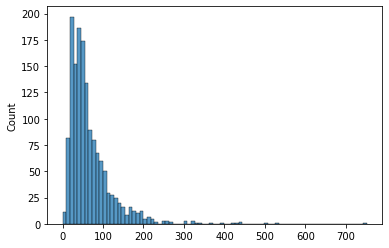

In [7]:
sns.histplot(extr_summary_word_count)
plt.show()

## Use pegasus to summarize the first text in the data frame

In [8]:
src_text = df['full_text'].iloc[0]

model_name = "google/pegasus-xsum"
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(device)
batch = tokenizer(src_text, truncation=True, padding="longest", return_tensors="pt", max_length=128).to(device)
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)

print(tgt_text[0])

C:\Users\Andy\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\generation_utils.py:1227: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 64 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Pop star Britney Spears has posted an angry Instagram message to her father, Jamie Spears.


## Use pegasus to summarize the first 5 texts in the data frame

In [9]:
def get_df_summaries(df):
    summaries = []
    
    model_name = "google/pegasus-xsum"
    device = "cuda" if torch.cuda.is_available() else "cpu"
    tokenizer = PegasusTokenizer.from_pretrained(model_name)
    model = PegasusForConditionalGeneration.from_pretrained(model_name).to(device)
    
    for full_text in df['full_text'][:5]:
        batch = tokenizer(full_text, truncation=True, padding="longest", return_tensors="pt", max_length=128).to(device)
        translated = model.generate(**batch)
        tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
        summaries.append(tgt_text[0])
    
    return summaries

In [10]:
start_time = time.time()

summaries = get_df_summaries(df)

print(summaries)
print('---------------------------------------')
print('Time for all predictions: {}'.format(time.time() - start_time))
print('---------------------------------------')
print('Avg time per prediction: {}'.format((time.time() - start_time)/5))

['Pop star Britney Spears has posted an angry Instagram message to her father, Jamie Spears.', 'One of the stars of US reality TV show Sister Wives has split from his third wife.', 'One of the stars of the new Game of Thrones spin-off has revealed how difficult it was to film sex scenes.', 'Ukraine\'s president has accused Russia of "deliberate and cynical" missile strikes in the east of the country.', 'A new TV series about a man who is wrongly accused of murder has been commissioned by a US network.']
---------------------------------------
Time for all predictions: 32.69750237464905
---------------------------------------
Avg time per prediction: 6.53969988822937


## Use pegasus to summarize the all text in the data frame

In [11]:
def get_df_summaries(df):
    summaries = []
    
    model_name = "google/pegasus-xsum"
    device = "cuda" if torch.cuda.is_available() else "cpu"
    tokenizer = PegasusTokenizer.from_pretrained(model_name)
    model = PegasusForConditionalGeneration.from_pretrained(model_name).to(device)
    
    for full_text in df['full_text']:
        batch = tokenizer(str(full_text), truncation=True, padding="longest", return_tensors="pt", max_length=128).to(device)
        translated = model.generate(**batch)
        tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
        summaries.append(tgt_text[0])
    
    return summaries

In [12]:
summaries = get_df_summaries(df)

df['pegasus_summary'] = summaries

df.to_csv('news_with_pegasus_summary')